# OrganoidMEA Spike Sorting



## Environment Setup

### IPython Environment

In [1]:
#Setuping up IPython Environment

#Interactive plots
%matplotlib notebook

#Show all output from a cell, not just the last calculation
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Changing the display width in the browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Define function for opening files with GUI
def openfile_dialog():
    from PyQt5 import QtGui
    from PyQt5 import QtGui, QtWidgets
    app = QtWidgets.QApplication([dir])
    fname = QtWidgets.QFileDialog.getOpenFileName(None, "Select a file...", '.', filter="All files (*)")
    return str(fname[0])

### Python Environment

In [2]:
import spikeinterface
import spikeinterface.extractors as se 
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import matplotlib.pylab as plt
import numpy as np
import nixio
from pathlib import Path

#Lists of Channel IDs for each well
ch_w1 = np.array([93, 228, 107, 114, 236, 213, 89, 97, 222, 224, 106, 229, 232, 235, 115, 85, 88, 214, 217, 221, 98, 103, 227, 108, 110, 111, 113, 237, 209, 210, 212, 90, 92, 218, 96, 99, 102, 225, 104, 105, 230, 109, 231, 233, 112, 234, 116, 208, 84, 86, 211, 87, 215, 91, 216, 94, 219, 220, 100, 101, 223])+1
ch_w2 = np.array([60, 183, 56, 64, 192, 198, 74, 81 , 206, 52, 55, 184, 187, 191, 65, 194, 73, 199, 202, 205, 82, 180, 182, 57, 59, 188, 63, 66, 69, 70, 197, 75, 77, 78, 80, 207, 179, 53, 181, 54, 185, 58, 186, 61, 189, 190, 67, 68, 193, 195, 71, 72, 200, 76, 201, 203, 79, 204, 83,])+1
ch_w2 = np.array([27, 168, 41, 48, 176, 153, 23, 31, 162, 164, 40, 169, 172, 175, 49, 19, 22, 154, 157, 161, 32, 37, 167, 42, 44, 45, 47, 177, 149, 150, 152, 24, 26, 158, 30, 33, 36, 165, 38, 39, 170, 43, 171, 173, 46, 174, 50, 148, 18, 20, 151, 21, 155, 25, 156, 28, 159, 160, 34, 35, 163,])+1
ch_w4 = np.array([126, 243, 122, 130, 252, 138, 8, 15, 146, 118, 121, 244, 247, 251, 131, 134, 7, 139, 142, 145, 16, 240, 242, 123, 125, 248, 129, 132, 3, 4, 137, 9, 11, 12, 14, 147, 239, 119, 241, 120, 245, 124, 246, 127, 249, 250, 1, 2, 133, 135, 5, 6, 140, 10, 141, 143, 13, 144, 17, 238, 117])+1



13:58:25 [I] klustakwik KlustaKwik2 version git-f7f14bcf-dirty


## Loading Recording/Probe

### Load the recording (edit as needed)

In [3]:
#Can choose between opening a dialog for a file, or specifiying a file directly with the two lines below

recording_file = openfile_dialog()
#recordings_folder = Path.cwd().parent / 'recordings'
#recording_file = recordings_folder / "OrgMEA_recording_test_01.h5"

#Choose which type of extractor you want to use:

#recording = se.MEArecRecordingExtractor(recording_file, locs_2d=True)
recording = se.MCSH5RecordingExtractor(recording_file)

### Sanity check the recordings

In [ ]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()

print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)

Plot the channel locations and a snippet of traces using `spikewidgets`:

In [ ]:
w_elec = sw.plot_electrode_geometry(recording, markersize=5)

The `get_traces()` function returns a NxT numpy array where N is the number of channel ids passed in (all channel ids are passed in by default) and T is the number of frames (determined by start_frame and end_frame).

In [ ]:
trace_snippet = recording.get_traces(start_frame=int(fs*0), end_frame=int(fs*1))
print('Traces shape:', trace_snippet.shape)

In [ ]:
w_ts = sw.plot_timeseries(recording)

### Loading Probe

We can load the `group` information in two ways:

- using the `set_channel_groups` in your RecordingExtractor (manually loading group information)
- loading a probe file using the `load_probe_file` from `spikeextractors` (automatically loading group information)

Let's use the second option. Probe files (`.prb`) also enable users to change the channel map (reorder the channels) and add channel grouping properties and locations.

In [ ]:
#Check whats in the probe file
#!cat OrgMEA_252.prb

In [4]:
recording_prb = recording.load_probe_file(probe_file = 'OrgMEA_256.prb')

print('Original channels:', recording.get_channel_ids())
print('Channels after loading the probe file:', recording_prb.get_channel_ids())
print('Channel groups after loading the probe file:', recording_prb.get_channel_groups())

Original channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

## Preprocessing

### Preprocessing recordings

Now that the probe information is loaded we can do some preprocessing using `spiketoolkit`.

We can filter the recordings, rereference the signals to remove noise, discard noisy channels, whiten the data, remove stimulation artifacts, etc. (more info [here](https://spiketoolkit.readthedocs.io/en/latest/preprocessing_example.html)).

For this notebook, let's filter the recordings, remove a noisy channel, and apply common median reference (CMR). All preprocessing modules return new `RecordingExtractor` objects that apply the underlying preprocessing function. This allows users to access the preprocessed data in the same way as the raw data.

Below, we remove our extra gnd electrodes, bandpass filter the recording, remove any bad channels, and apply common median reference to the original recording.

In [24]:
#remove ground electrodes
recording_gnd_rem = st.preprocessing.remove_bad_channels(recording_prb, bad_channel_ids=np.array([226, 95, 196, 62, 29, 166, 136, 128])+1)

#filter signal
recording_f = st.preprocessing.bandpass_filter(recording_gnd_rem, freq_min=200, freq_max=6000, cache_to_file=True)

#remove bad channels
#recording_f_gnd_bad_rem = st.preprocessing.remove_bad_channels(recording_f_gnd_rem, bad_channels=np.array([XX, XX, XX, XX])+1)

#recording_rm_noise = st.preprocessing.remove_bad_channels(recording_f, bad_channels=[5])
recording_cmr = st.preprocessing.common_reference(recording_f, reference='median')

recording_lfp = st.preprocessing.bandpass_filter(recording_gnd_rem, freq_min=1, freq_max=300)
recording_lfp = st.preprocessing.resample(recording_lfp, 1000)
recording_mua = st.preprocessing.resample(st.preprocessing.rectify(recording_gnd_rem), 1000)


Unable to remove temporary file


### Sanity Check preproccessed recordings

In [ ]:
trace_f_snippet = recording_f.get_traces(start_frame=int(fs*0), end_frame=int(fs*1))
trace_cmr_snippet = recording_cmr.get_traces(start_frame=int(fs*0), end_frame=int(fs*1))

print(trace_f_snippet.shape)
print(trace_cmr_snippet.shape)

We can plot the bandpassfiltered snippets below

In [ ]:
sw.plot_timeseries(recording_f, channel_ids=[2, 3])

In [ ]:
print('Channel ids for CMR recordings:', recording_cmr.get_channel_ids())
print('Channel groups for CMR recording:', recording_cmr.get_channel_groups())

## Spike Sorting

We can now run spike sorting on the above recording. We will use `SpyKING Circus` and we will run spike sorting on each group separately.

Let's first check the installed sorters in spiketoolkit to see if SpyKING Circus is available. Then we can check the `SpyKING Circus` default parameters.

We will sort the bandpass filtered recording (the `recording_rm_noise` object)

### Check Available Sorters

In [35]:
#Make sure SpyKING Circus is installed properly
print(ss.available_sorters())
print(ss.installed_sorter_list)

['herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'klusta', 'mountainsort4', 'spykingcircus', 'tridesclous', 'waveclus']
[<class 'spikesorters.klusta.klusta.KlustaSorter'>, <class 'spikesorters.spyking_circus.spyking_circus.SpykingcircusSorter'>]


### Change sorter parameters

In [6]:
default_circus_params = ss.SpykingcircusSorter.default_params()
print(default_circus_params)

{'probe_file': None, 'detect_sign': -1, 'adjacency_radius': 200, 'detect_threshold': 6, 'template_width_ms': 3, 'filter': True, 'merge_spikes': True, 'auto_merge': 0.5, 'num_workers': None, 'electrode_dimensions': None, 'whitening_max_elts': 1000, 'clustering_max_elts': 10000}


We will set the `adjacency_radius` to 150 microns.

In [7]:
circus_params = default_circus_params
circus_params['detect_threshold'] = 5
circus_params['adjacency_radius'] = 100

### Run Sorting

In [8]:
# run spike sorting by group
sorting_circus_split = ss.run_spykingcircus(recording_f, 
                                    **circus_params, 
                                     output_folder='results_sk', 
                                     grouping_property='group')
print('Found', len(sorting_circus_split.get_unit_ids()), 'units')

RUNNING SHELL SCRIPT: C:\Users\MCDONA~1\AppData\Local\Temp\tmp_shellscript86ql5oqb\script.bat
RUNNING SHELL SCRIPT: C:\Users\MCDONA~1\AppData\Local\Temp\tmp_shellscriptp7mnpm73\script.bat
RUNNING SHELL SCRIPT: C:\Users\MCDONA~1\AppData\Local\Temp\tmp_shellscriptif9mam7c\script.bat
RUNNING SHELL SCRIPT: C:\Users\MCDONA~1\AppData\Local\Temp\tmp_shellscript2o5m758d\script.bat


c:\users\mcdonaldmatthew\pycharmprojects\organoidmea\venv\lib\site-packages\spikeextractors\extractors\spykingcircusextractors\spykingcircusextractors.py:113: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f_results = h5py.File(results)


Found 206 units


In [ ]:
#wf = st.postprocessing.get_unit_waveforms(recording_f, sorting_circus_split)

### Sorting Sanity Check

The spike sorting returns a `SortingExtractor` object. Let's see some of its functions:

In [ ]:
print('Units', sorting_circus_split.get_unit_ids())

In [ ]:
print('Units', sorting_circus_split.get_unit_spike_train(13))

We can use `spikewidgets` functions to quickly visualize some unit features:

In [ ]:
w_wf = sw.plot_unit_waveforms(recording_f, sorting_circus_split, unit_ids=[10], max_spikes_per_unit=10)

In [ ]:
w_rs = sw.plot_rasters(sorting_circus_split)

### Automatic Curation

In [25]:
wf = st.postprocessing.get_unit_waveforms(recording_f, sorting_circus_split, ms_before=1, ms_after=2, save_as_features=True, verbose=True)

Waveform 1/206
Waveform 2/206
Waveform 3/206
Waveform 4/206
Waveform 5/206
Waveform 6/206
Waveform 7/206
Waveform 8/206
Waveform 9/206
Waveform 10/206
Waveform 11/206
Waveform 12/206
Waveform 13/206
Waveform 14/206
Waveform 15/206
Waveform 16/206
Waveform 17/206
Waveform 18/206
Waveform 19/206
Waveform 20/206
Waveform 21/206
Waveform 22/206
Waveform 23/206
Waveform 24/206
Waveform 25/206
Waveform 26/206
Waveform 27/206
Waveform 28/206
Waveform 29/206
Waveform 30/206
Waveform 31/206
Waveform 32/206
Waveform 33/206
Waveform 34/206
Waveform 35/206
Waveform 36/206
Waveform 37/206
Waveform 38/206
Waveform 39/206
Waveform 40/206
Waveform 41/206
Waveform 42/206
Waveform 43/206
Waveform 44/206
Waveform 45/206
Waveform 46/206
Waveform 47/206
Waveform 48/206
Waveform 49/206
Waveform 50/206
Waveform 51/206
Waveform 52/206
Waveform 53/206
Waveform 54/206
Waveform 55/206
Waveform 56/206
Waveform 57/206
Waveform 58/206
Waveform 59/206
Waveform 60/206
Waveform 61/206
Waveform 62/206
Waveform 63/206
W

In [33]:
print(sorting_circus_split.get_unit_spike_feature_names(unit_id=0))
print(wf[0].shape)

['waveforms']
(87, 248, 96)


We can now perform some automatic curation by thresholding low snr units on the split sorting result

In [34]:
sorting_circus_split_curated = st.curation.threshold_snr(recording=recording_cmr, sorting=sorting_circus_split, threshold=5)
print('Curated Units', sorting_circus_split_curated.get_unit_ids())

Curated Units [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205]


## Data Visualization

### Plot Recordings

In [ ]:
w_ts0 = sw.plot_timeseries(recording, channel_ids=[2])

### Plot LFP

<IPython.core.display.Javascript object>


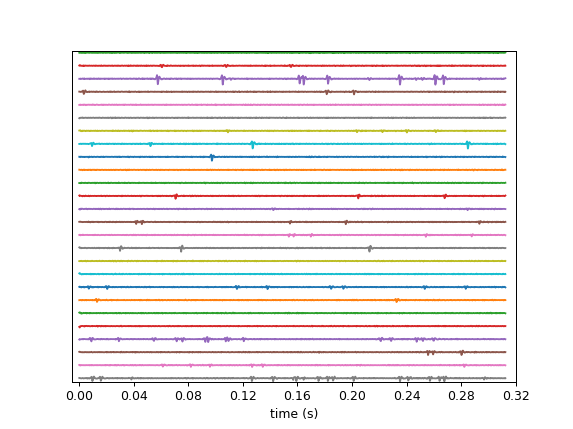

In [16]:
w_LFP = sw.plot_timeseries(recording_lfp)

### Plot power spectrum

<IPython.core.display.Javascript object>


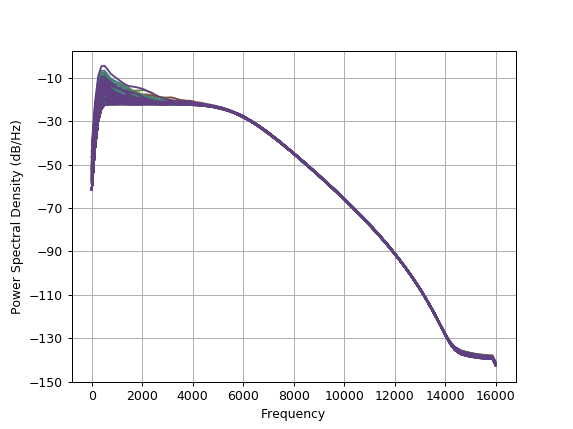

In [21]:
w_sp = sw.plot_spectrum(recording_gnd_rem, color_groups=True)

### Plot Spectrogram of Single Channel

In [ ]:
chosen_channel = 2
w_spg = sw.plot_spectrogram(recording_gnd_rem, channel=chosen_channel, nfft=2048)

### Plot Spike Raster Plot

In [ ]:
w_rs = sw.plot_rasters(sorting_circus_split)

### Plot Inter-Spike Interval Distribution

In [ ]:
w_isi = sw.plot_isi_distribution(sorting_circus_split, bins=10, window=1)

### Plot Unit Waveforms

<IPython.core.display.Javascript object>


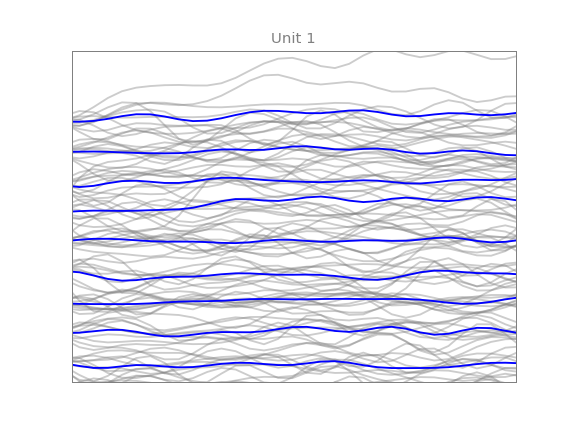

In [32]:
w_wf2 = sw.plot_unit_waveforms(recording_f, sorting_circus_split, channel_ids=ch_w1, max_spikes_per_unit=10, unit_ids=[1])

### Plot Amplitudes Distribution 

In [ ]:
w_ampd = sw.plot_amplitudes_distribution(recording_f, sorting_circus_split, max_spikes_per_unit=300)

### Plot Amplitudes Timeseries

In [ ]:
w_ampt = sw.plot_amplitudes_timeseries(recording_f, sorting_circus_split, max_spikes_per_unit=10)

## Save sorting output

In [ ]:
save_folder = Path.cwd().parent / 'saved__sort_test'

se.NpzSortingExtractor.write_sorting(sorting_circus_split, save_path=save_folder)